In [1]:
#Berfin Okçu WTech Python ile Veri Bilimi Ödev 1

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_2022 = pd.read_csv('subway_2022_summer.csv')

In [4]:
df_2023 = pd.read_csv('subway_2023_summer.csv')

In [5]:
df_2023.sample()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
116595,06/02/2023 02:00:00 PM,subway,4,"Broadway (N,W)",Queens,metrocard,Metrocard - Other,16,0,40.761822,-73.925507,POINT (-73.92550659179688 40.76182174682617)


In [6]:
df = pd.concat([df_2022, df_2023], axis=0, ignore_index=True) #axis=0 row eklemek istiyorum anlamında

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12584872 entries, 0 to 12584871
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ GB


In [8]:
df.describe()

,ridership,transfers,latitude,longitude
count,1.258487e+07,1.258487e+07,1.258487e+07,1.258487e+07
mean,4.284630e+01,1.809979e+00,4.073197e+01,-7.393499e+01
std,1.345590e+02,1.129146e+01,7.846317e-02,5.629568e-02
min,1.000000e+00,0.000000e+00,4.057613e+01,-7.407484e+01
25%,4.000000e+00,0.000000e+00,4.067731e+01,-7.398123e+01
50%,1.200000e+01,0.000000e+00,4.072340e+01,-7.394748e+01
75%,3.500000e+01,1.000000e+00,4.079164e+01,-7.389923e+01
max,1.252100e+04,1.053000e+03,4.090313e+01,-7.375540e+01


In [9]:
df.shape

(12584872, 12)

In [10]:
df.columns

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [13]:
df['transit_timestamp'].head()

0    06/01/2022 01:00:00 AM
1    06/01/2022 01:00:00 AM
2    06/01/2022 01:00:00 AM
3    06/01/2022 01:00:00 AM
4    06/01/2022 01:00:00 AM
Name: transit_timestamp, dtype: object

In [14]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [15]:
df.loc[237494, 'transit_timestamp'].day_name()

'Saturday'

In [16]:
df['time_of_day'] = df['transit_timestamp'].dt.time
df['time_of_day']

0           01:00:00
1           01:00:00
2           01:00:00
3           01:00:00
4           01:00:00
              ...   
12584867    23:00:00
12584868    23:00:00
12584869    23:00:00
12584870    23:00:00
12584871    23:00:00
Name: time_of_day, Length: 12584872, dtype: object

In [17]:
df['transit_timestamp']

0          2022-06-01 01:00:00
1          2022-06-01 01:00:00
2          2022-06-01 01:00:00
3          2022-06-01 01:00:00
4          2022-06-01 01:00:00
                   ...        
12584867   2023-08-31 23:00:00
12584868   2023-08-31 23:00:00
12584869   2023-08-31 23:00:00
12584870   2023-08-31 23:00:00
12584871   2023-08-31 23:00:00
Name: transit_timestamp, Length: 12584872, dtype: datetime64[ns]

In [18]:
df['day_of_week'] = df['transit_timestamp'].dt.day_name()
df['day_of_week']

0           Wednesday
1           Wednesday
2           Wednesday
3           Wednesday
4           Wednesday
              ...    
12584867     Thursday
12584868     Thursday
12584869     Thursday
12584870     Thursday
12584871     Thursday
Name: day_of_week, Length: 12584872, dtype: object

In [19]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,time_of_day,day_of_week
0,2022-06-01 01:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Fair Fare,1,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),01:00:00,Wednesday
1,2022-06-01 01:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Other,4,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),01:00:00,Wednesday
2,2022-06-01 01:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Full Fare,3,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),01:00:00,Wednesday
3,2022-06-01 01:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Unlimited 30-Day,4,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),01:00:00,Wednesday
4,2022-06-01 01:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,metrocard,Metrocard - Unlimited 7-Day,2,0,40.775036,-73.912033,POINT (-73.91203308105469 40.7750358581543),01:00:00,Wednesday


In [20]:
df.groupby(['transit_timestamp', 'station_complex']).max(numeric_only=True).sort_values('ridership', ascending=False).head(50)

,,ridership,transfers,latitude,longitude
transit_timestamp,station_complex,,,,
2023-08-12 23:00:00,"161 St-Yankee Stadium (B,D,4)",12521,0,40.827995,-73.925652
2023-07-25 17:00:00,"Grand Central-42 St (S,4,5,6,7)",12445,41,40.751778,-73.976845
2023-07-26 17:00:00,"Grand Central-42 St (S,4,5,6,7)",11417,34,40.751778,-73.976845
2023-06-21 17:00:00,"Grand Central-42 St (S,4,5,6,7)",11387,27,40.751778,-73.976845
2023-06-13 17:00:00,"Grand Central-42 St (S,4,5,6,7)",11154,31,40.751778,-73.976845
2023-07-18 17:00:00,"Grand Central-42 St (S,4,5,6,7)",11107,33,40.751778,-73.976845
2023-08-13 23:00:00,"161 St-Yankee Stadium (B,D,4)",11015,2,40.827995,-73.925652
2023-07-19 17:00:00,"Grand Central-42 St (S,4,5,6,7)",11011,36,40.751778,-73.976845
2023-07-11 17:00:00,"Grand Central-42 St (S,4,5,6,7)",10983,39,40.751778,-73.976845


In [21]:
df.groupby(['borough', 'station_complex', 'transit_timestamp']).max(numeric_only=True).sort_values('ridership', ascending=False).head(50)

ridership  \
borough   station_complex                                  transit_timestamp                
Bronx     161 St-Yankee Stadium (B,D,4)                    2023-08-12 23:00:00      12521   
Manhattan Grand Central-42 St (S,4,5,6,7)                  2023-07-25 17:00:00      12445   
                                                           2023-07-26 17:00:00      11417   
                                                           2023-06-21 17:00:00      11387   
                                                           2023-06-13 17:00:00      11154   
                                                           2023-07-18 17:00:00      11107   
Bronx     161 St-Yankee Stadium (B,D,4)                    2023-08-13 23:00:00      11015   
Manhattan Grand Central-42 St (S,4,5,6,7)                  2023-07-19 17:00:00      11011   
                                                           2023-07-11 17:00:00      10983   
                                                           2023-07-12 17:00:00      10970   
                                                           2023-06-14 17:00:00      10928   
                                                           2023-06-20 17:00:00      10788   
                                                           2023-06-06 17:00:00      10761   
                                                           2023-06-27 17:00:00      10665   
                                                           2023-08-01 17:00:00      10608   
                                                           2023-06-22 17:00:00      10584   
                                                           2023-08-02 17:00:00      10502   
                                                           2023-08-09 17:00:00      10335   
                                                           2023-06-28 17:00:00      10198   
                                                           2023-07-20 17:00:00      10190   
                                                           2023-08-08 17:00:00      10175   
                                                           2023-06-07 17:00:00      10115   
                                                           2023-08-03 17:00:00      10045   
                                                           2023-08-10 17:00:00      10021   
                                                           2023-07-27 17:00:00      10014   
                                                           2023-08-15 17:00:00       9859   
                                                           2023-07-13 17:00:00       9766   
                                                           2023-06-29 17:00:00       9741   
                                                           2023-06-15 17:00:00       9720   
                                                           2023-08-29 17:00:00       9638   
                                                           2023-08-16 17:00:00       9486   
                                                           2023-07-06 17:00:00       9459   
                                                           2023-08-30 17:00:00       9404   
                                                           2023-06-01 17:00:00       9404   
                                                           2023-08-22 17:00:00       9359   
                                                           2023-08-23 17:00:00       9275   
                                                           2023-06-21 18:00:00       9191   
                                                           2023-07-25 18:00:00       9142   
          Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E) 2023-07-26 17:00:00       9087   
          Grand Central-42 St (S,4,5,6,7)                  2023-07-05 17:00:00       9022   
          Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E) 2023-07-25 17:00:00       8945   
          Grand Central-42 St (S,4,5,6,7)                  2023-06-14 18:00:00   

In [22]:
df.groupby(['borough', 'station_complex', 'transit_timestamp']).mean(numeric_only=True).sort_values('ridership', ascending=False).head(50)

ridership  \
borough   station_complex                                  transit_timestamp                  
Manhattan Grand Central-42 St (S,4,5,6,7)                  2023-07-25 17:00:00  2240.888889   
                                                           2023-06-21 17:00:00  2095.000000   
                                                           2023-07-26 17:00:00  2050.222222   
                                                           2023-06-20 17:00:00  2004.888889   
                                                           2023-07-11 17:00:00  1991.000000   
                                                           2023-07-12 17:00:00  1983.888889   
                                                           2023-06-27 17:00:00  1974.444444   
                                                           2023-08-02 17:00:00  1935.555556   
Bronx     161 St-Yankee Stadium (B,D,4)                    2023-08-12 23:00:00  1919.125000   
Manhattan Grand Central-42 St (S,4,5,6,7)                  2023-06-07 17:00:00  1906.222222   
                                                           2023-06-28 17:00:00  1889.222222   
                                                           2023-06-13 17:00:00  1887.300000   
                                                           2023-08-10 17:00:00  1847.888889   
                                                           2023-07-20 17:00:00  1846.000000   
          Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E) 2023-07-26 17:00:00  1845.666667   
          Grand Central-42 St (S,4,5,6,7)                  2023-06-14 17:00:00  1836.600000   
                                                           2022-06-21 17:00:00  1836.375000   
                                                           2023-06-15 17:00:00  1824.333333   
                                                           2022-06-15 17:00:00  1819.250000   
                                                           2023-07-13 17:00:00  1818.333333   
                                                           2023-07-18 17:00:00  1817.000000   
                                                           2022-07-12 17:00:00  1816.500000   
                                                           2023-06-06 17:00:00  1815.200000   
                                                           2022-07-26 17:00:00  1806.750000   
                                                           2023-07-19 17:00:00  1804.400000   
                                                           2023-07-27 17:00:00  1801.000000   
                                                           2023-06-29 17:00:00  1794.222222   
                                                           2022-06-07 17:00:00  1791.375000   
          Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E) 2023-06-21 17:00:00  1783.222222   
                                                           2023-06-13 17:00:00  1781.555556   
                                                           2023-06-14 17:00:00  1766.222222   
                                                           2023-07-19 17:00:00  1755.888889   
          Grand Central-42 St (S,4,5,6,7)                  2023-06-22 17:00:00  1745.500000   
                                                           2023-08-01 17:00:00  1742.600000   
                                                           2023-07-06 17:00:00  1741.444444   
                                                           2022-07-19 17:00:00  1739.625000   
                                                           2022-07-13 17:00:00  1737.000000   
                                                           2023-08-16 17:00:00  1732.666667   
                                                           2022-06-01 17:00:00  1724.444444   
Bronx     161 St-Yankee Stadium (B,D,4)                    2023-08-13 23:00:00  1721.500000   
                                                           2023-07-07 21:00:00  1721.250000 

In [23]:
df_sorted = df.sort_values(by=['ridership'], ascending=False)

In [24]:
df_sorted

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,time_of_day,day_of_week
11262447,2023-08-12 23:00:00,subway,604,"161 St-Yankee Stadium (B,D,4)",Bronx,omny,OMNY - Full Fare,12521,0,40.827995,-73.925652,POINT (-73.92565155029297 40.82799530029297),23:00:00,Saturday
9988580,2023-07-25 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,12445,41,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Tuesday
10061151,2023-07-26 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,11417,34,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Wednesday
7631158,2023-06-21 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,11387,26,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Wednesday
7064008,2023-06-13 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,11154,31,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10813474,2023-08-06 14:00:00,subway,291,Clinton-Washington Avs (G),Brooklyn,omny,OMNY - Seniors & Disability,1,0,40.688087,-73.966843,POINT (-73.96684265136719 40.688087463378906),14:00:00,Sunday
4881727,2022-08-12 13:00:00,subway,20,"City Hall (R,W)",Manhattan,metrocard,Metrocard - Students,1,0,40.713284,-74.006981,POINT (-74.0069808959961 40.71328353881836),13:00:00,Friday
10813471,2023-08-06 14:00:00,subway,291,Clinton-Washington Avs (G),Brooklyn,metrocard,Metrocard - Seniors & Disability,1,0,40.688087,-73.966843,POINT (-73.96684265136719 40.688087463378906),14:00:00,Sunday
4881728,2022-08-12 13:00:00,subway,200,"Beach 90 St (A,S)",Queens,metrocard,Metrocard - Fair Fare,1,0,40.588036,-73.813644,POINT (-73.81364440917969 40.588035583496094),13:00:00,Friday


In [25]:
df_most_crowded = df_sorted[:1000]
df_most_crowded

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,time_of_day,day_of_week
11262447,2023-08-12 23:00:00,subway,604,"161 St-Yankee Stadium (B,D,4)",Bronx,omny,OMNY - Full Fare,12521,0,40.827995,-73.925652,POINT (-73.92565155029297 40.82799530029297),23:00:00,Saturday
9988580,2023-07-25 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,12445,41,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Tuesday
10061151,2023-07-26 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,11417,34,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Wednesday
7631158,2023-06-21 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,11387,26,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Wednesday
7064008,2023-06-13 17:00:00,subway,610,"Grand Central-42 St (S,4,5,6,7)",Manhattan,omny,OMNY - Full Fare,11154,31,40.751778,-73.976845,POINT (-73.97684478759766 40.75177764892578),17:00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059516,2023-06-27 19:00:00,subway,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,omny,OMNY - Full Fare,4270,28,40.757309,-73.986755,POINT (-73.98675537109375 40.75730895996094),19:00:00,Tuesday
7561777,2023-06-20 18:00:00,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,omny,OMNY - Full Fare,4269,2,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),18:00:00,Tuesday
11909740,2023-08-22 09:00:00,subway,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,omny,OMNY - Full Fare,4265,53,40.757309,-73.986755,POINT (-73.98675537109375 40.75730895996094),09:00:00,Tuesday
5160006,2022-08-16 18:00:00,subway,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",Manhattan,omny,OMNY - Full Fare,4265,29,40.757309,-73.986755,POINT (-73.98675537109375 40.75730895996094),18:00:00,Tuesday


In [26]:
df_most_crowded.station_complex.unique()

array(['161 St-Yankee Stadium (B,D,4)', 'Grand Central-42 St (S,4,5,6,7)',
       'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)',
       'Mets-Willets Point (7)', 'Fulton St (A,C,J,Z,2,3,4,5)',
       '47-50 Sts-Rockefeller Ctr (B,D,F,M)',
       '34 St-Herald Sq (B,D,F,M,N,Q,R,W)', '34 St-Penn Station (A,C,E)',
       'Lexington Av-53 St (E,M)/51 St (6)',
       'Bryant Pk (B,D,F,M)/5 Av (7)',
       'Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)'], dtype=object)

In [27]:
most_crowded_stations = pd.DataFrame(df_most_crowded.station_complex.value_counts())
most_crowded_stations

,count
station_complex,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",323
"Grand Central-42 St (S,4,5,6,7)",320
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",83
"Fulton St (A,C,J,Z,2,3,4,5)",63
"47-50 Sts-Rockefeller Ctr (B,D,F,M)",46
"161 St-Yankee Stadium (B,D,4)",41
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",34
"Bryant Pk (B,D,F,M)/5 Av (7)",28
"Lexington Av-53 St (E,M)/51 St (6)",22


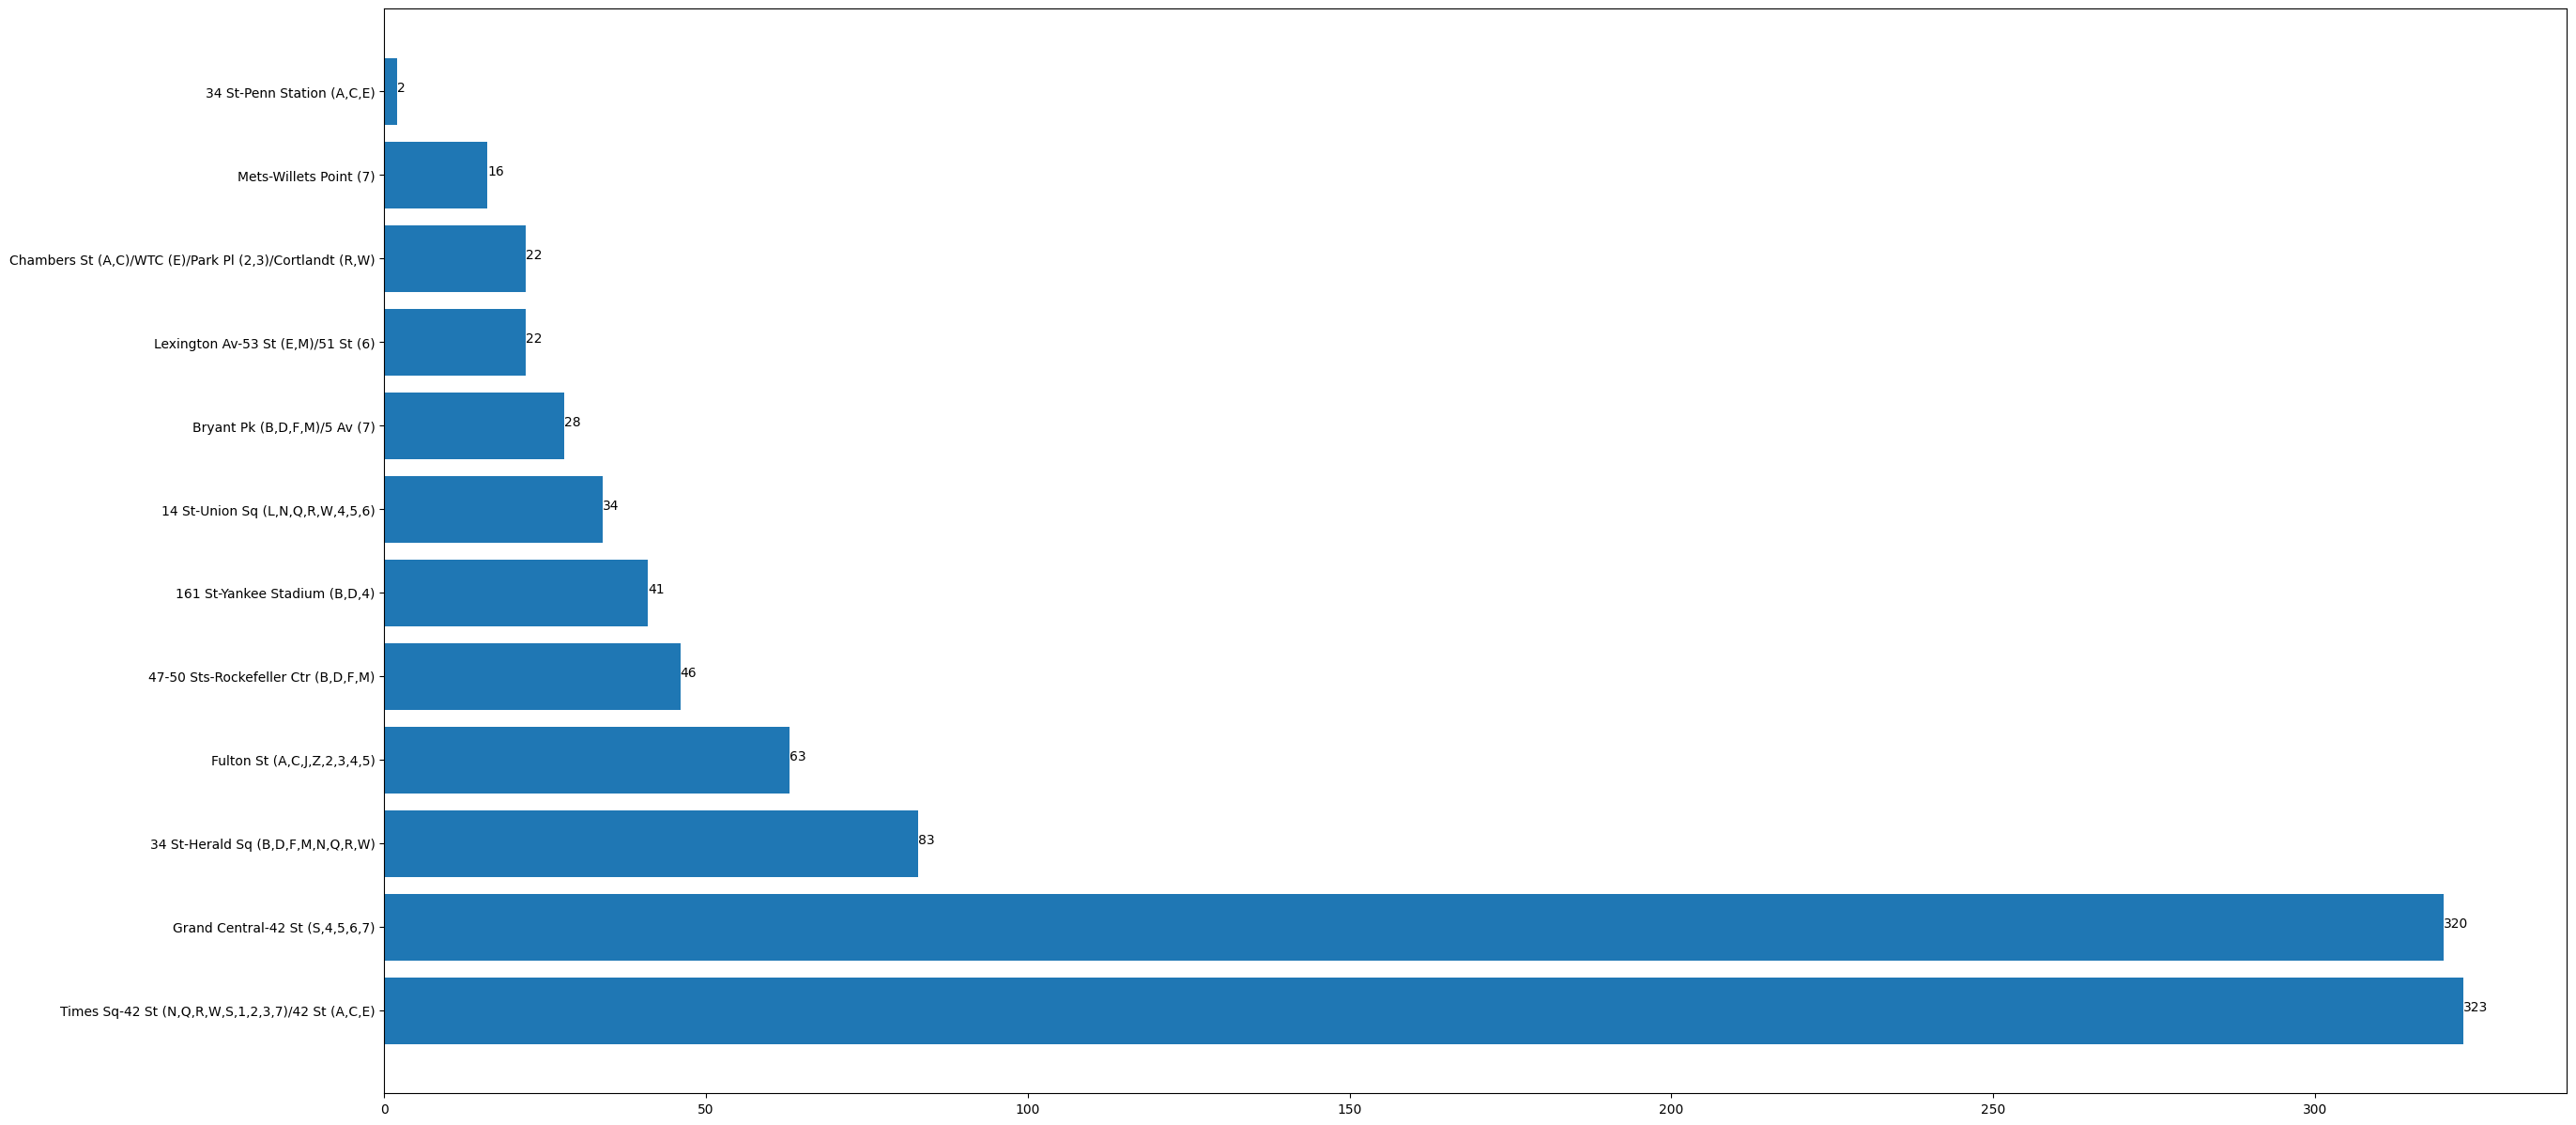

In [28]:
plt.figure(figsize=[30,15])
plt.barh(most_crowded_stations.index, most_crowded_stations['count'])
for index, value in enumerate(most_crowded_stations['count']):
    plt.text(value, index, str(value))
plt.savefig("most_crowded_stations.png")

In [29]:
most_crowded_days = pd.DataFrame(df_most_crowded.day_of_week.value_counts())
most_crowded_days 

,count
day_of_week,
Tuesday,284
Wednesday,278
Thursday,231
Monday,97
Friday,67
Saturday,29
Sunday,14


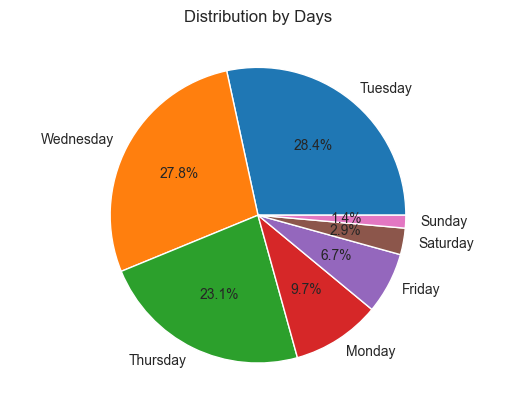

In [30]:
sns.set_style("whitegrid")
plt.title('Distribution by Days')
plt.axis('equal')
plt.pie(most_crowded_days['count'], labels=most_crowded_days.index, autopct='%1.1f%%')
plt.savefig("distributionbydays.png")

In [31]:
most_crowded_hours= pd.DataFrame(df_most_crowded['time_of_day'].value_counts())
most_crowded_hours

,count
time_of_day,
17:00:00,457
18:00:00,235
08:00:00,98
16:00:00,90
22:00:00,40
21:00:00,29
09:00:00,25
19:00:00,13
23:00:00,8


In [32]:
most_crowded_hours['count']

time_of_day
17:00:00    457
18:00:00    235
08:00:00     98
16:00:00     90
22:00:00     40
21:00:00     29
09:00:00     25
19:00:00     13
23:00:00      8
15:00:00      4
00:00:00      1
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1312cca7a10>,
 [Text(0.1481458317165507, 1.0899783541635182, '17:00:00'),
  Text(-0.9816712562700569, -0.4963079131075469, '18:00:00'),
  Text(-0.062170488081591466, -1.0982416994503974, '08:00:00'),
  Text(0.5599454739969131, -0.9468162789846679, '16:00:00'),
  Text(0.8899186423571197, -0.6465638483438902, '22:00:00'),
  Text(1.0081526266890974, -0.4400321366671685, '21:00:00'),
  Text(1.0679723286167937, -0.26350541798760624, '09:00:00'),
  Text(1.091753894468086, -0.1344374721339532, '19:00:00'),
  Text(1.0982416999960993, -0.06217047844176568, '23:00:00'),
  Text(1.099804585947279, -0.02073337235796995, '15:00:00'),
  Text(1.0999945714460015, -0.0034558341001126413, '00:00:00')],
 [Text(0.08080681729993675, 0.5945336477255553, '45.7%'),
  Text(-0.5354570488745765, -0.270713407149571, '23.5%'),
  Text(-0.0339111753172317, -0.599040926972944, '9.8%'),
  Text(0.30542480399831623, -0.516445243082546, '9.0%'),
  Text(0.4854101685584289, -0.35267119000575

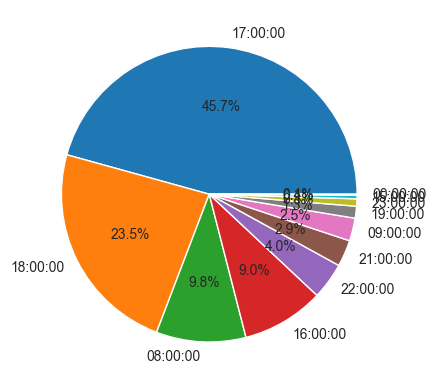

In [33]:
#plt.bar(most_crowded_hours.index(), most_crowded_hours['count']);
plt.pie(most_crowded_hours['count'], labels=most_crowded_hours.index, autopct='%1.1f%%')

In [34]:
df_crowded =df_most_crowded[["ridership", "day_of_week", "time_of_day"]]
df_crowded

,ridership,day_of_week,time_of_day
11262447,12521,Saturday,23:00:00
9988580,12445,Tuesday,17:00:00
10061151,11417,Wednesday,17:00:00
7631158,11387,Wednesday,17:00:00
7064008,11154,Tuesday,17:00:00
...,...,...,...
8059516,4270,Tuesday,19:00:00
7561777,4269,Tuesday,18:00:00
11909740,4265,Tuesday,09:00:00
5160006,4265,Tuesday,18:00:00


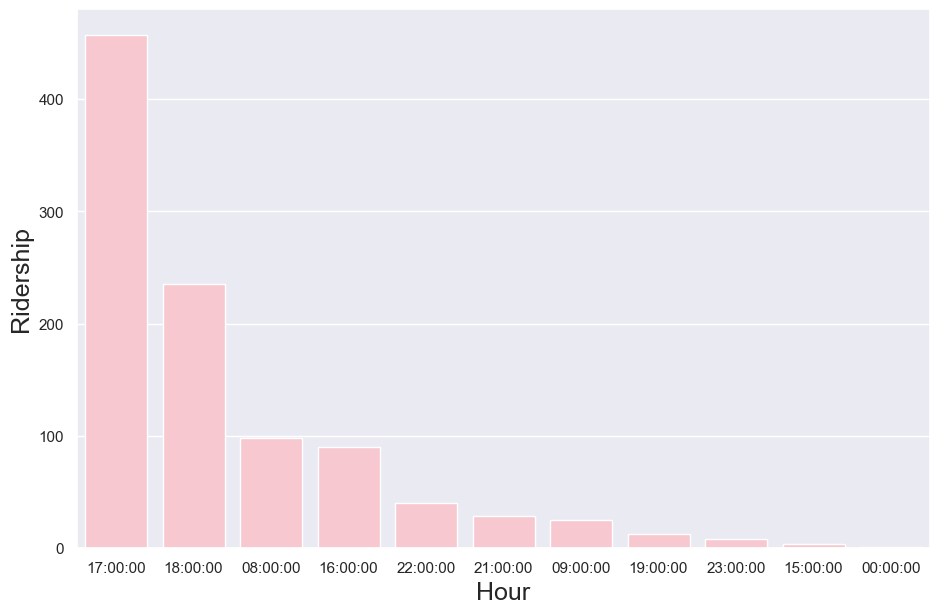

In [35]:
sns.set_theme(rc={'figure.figsize':(11,7)})
sns.barplot(x=most_crowded_hours.index, y=most_crowded_hours['count'], data=most_crowded_hours, color= 'pink' );
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Ridership', fontsize=18)
plt.savefig("ridership.png")

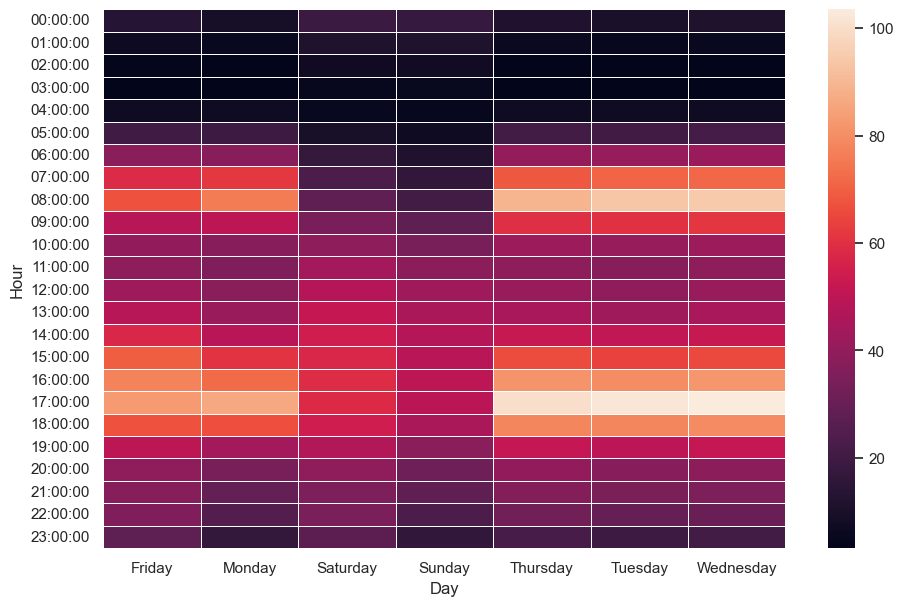

In [36]:
sns.heatmap(df.groupby([df.day_of_week, df.time_of_day])
   ['ridership'].mean()
   .rename_axis(index=['Day','Hour'])
   .unstack(level=0), linewidth=0.5
)
plt.savefig("heatmap.png")

In [37]:
df['ridership'].mean()

42.84630181379676

# Additional Datasets

In [39]:
women_owned_businesses = pd.read_csv('SBS_Certified_Business_List.csv')


In [40]:
women_owned_businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Account_Number                             10976 non-null  int64  
 1   Vendor_Formal_Name                         10976 non-null  object 
 2   Vendor_DBA                                 1420 non-null   object 
 3   First_Name                                 10955 non-null  object 
 4   Last_Name                                  10954 non-null  object 
 5   telephone                                  10969 non-null  object 
 6   Business_Description                       10971 non-null  object 
 7   Certification                              10976 non-null  object 
 8   Certification_Renewal_Date                 7966 non-null   object 
 9   Ethnicity                                  10974 non-null  object 
 10  Address_Line_1        

In [41]:
women_owned_businesses.head()

,Account_Number,Vendor_Formal_Name,Vendor_DBA,First_Name,Last_Name,telephone,Business_Description,Certification,Certification_Renewal_Date,Ethnicity,...,Enrolled_in_PASSPort,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,311147,#1Pho Inc,Zenyai,Albert,Jethanamest,6463879761,Zenyai Viet Cajun & Pho Restaurant is dedicate...,MBE,10/31/2025,ASIAN,...,Yes,BROOKLYN,40.714065,-73.960252,301.0,34.0,3397699.0,3.023938e+09,551.0,BK0102
1,357418,#NAME?,"Kilduff Underground Engineering, Inc.",Todd,Kilduff,2019939696,"Kilduff Underground Engineering, Inc. (KUE) is...",MBE,7/31/2025,HISPANIC,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,331157,024 Inc,NaN,Gena,Surphlis,3479035447,024™ is a premium home fragrance brand that de...,"MBE,WBE",04/30/2026;04/30/2026,BLACK,...,No,BRONX,40.863508,-73.821595,210.0,12.0,2093860.0,2.051350e+09,30202.0,BX1004
3,10003,1 Call Building Maintenance Corp.,NaN,Lorris,Alleyne,3474690806,Our Services include Office Cleaning Carpet cl...,MBE,3/31/2026,BLACK,...,Yes,BROOKLYN,40.680772,-73.962817,308.0,35.0,3027510.0,3.011240e+09,203.0,BK0801
4,342721,1 Of A Kind Home Health Care L.L.C.,NaN,Andrea,David,7183008023,NYS Licensed Home Health Agency,"MBE,WBE",03/31/2027;03/31/2027,BLACK,...,Yes,BROOKLYN,40.703905,-73.928988,304.0,34.0,3258681.0,3.031580e+09,427.0,BK0401


In [42]:
women_owned_businesses.columns

Index(['Account_Number', 'Vendor_Formal_Name', 'Vendor_DBA', 'First_Name',
       'Last_Name', 'telephone', 'Business_Description', 'Certification',
       'Certification_Renewal_Date', 'Ethnicity', 'Address_Line_1',
       'Address_Line_2', 'City', 'State', 'Postcode', 'Mailing_Address_Line_1',
       'Mailing_Address_Line_2', 'Mailing_City', 'Mailing_State',
       'Mailing_Zip', 'Website', 'Date_Of_Establishment',
       'Aggregate_Bonding_Limit', 'Signatory_To_Union_Contracts',
       'ID6_digit_NAICS_code', 'NAICS_Sector', 'NAICS_Subsector',
       'NAICS_Title', 'Types_of_Construction_Projects_Performed', 'NIGP_codes',
       'Name_of_Client_Job_Exp_1', 'Largest_Value_of_Contract',
       'Percent_Self_Performed_Job_Exp_1', 'Date_of_Work_Job_Exp_1',
       'Description_of_Work_Job_Exp_1', 'Name_of_Client_Job_Exp_2',
       'Value_of_Contract_Job_Exp_2', 'Percent_Self_Performed_Job_Exp_2',
       'Date_of_Work_Job_Exp_2', 'Description_of_Work_Job_Exp_2',
       'Name_of_Client_Job

In [43]:
women_owned_businesses.Borough.isnull().sum()

4179

In [44]:
women_owned_businesses.dropna(subset=['Borough'], inplace=True)

In [45]:
women_owned_businesses.Borough.isnull().sum()

0

In [46]:
women_owned_businesses.isnull().sum()

Account_Number                                  0
Vendor_Formal_Name                              0
Vendor_DBA                                   5898
First_Name                                     16
Last_Name                                      17
telephone                                       5
Business_Description                            4
Certification                                   0
Certification_Renewal_Date                   1614
Ethnicity                                       2
Address_Line_1                                  0
Address_Line_2                               3641
City                                            0
State                                           0
Postcode                                        0
Mailing_Address_Line_1                          0
Mailing_Address_Line_2                       3651
Mailing_City                                    0
Mailing_State                                   0
Mailing_Zip                                     0


In [47]:
wob = pd.DataFrame(women_owned_businesses.Borough.value_counts())
wob

,count
Borough,
MANHATTAN,2146
BROOKLYN,1897
QUEENS,1711
BRONX,745
STATEN IS,298


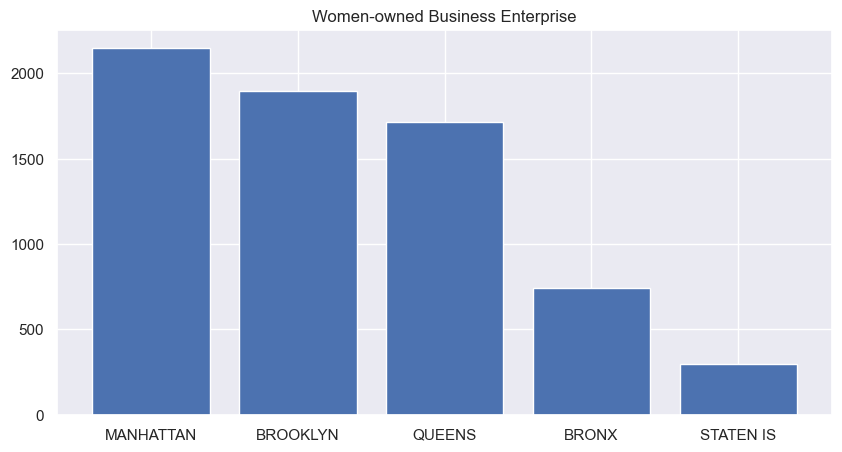

In [48]:
plt.figure(figsize=[10,5])
plt.bar(wob.index, wob['count'], data=women_owned_businesses)
plt.title("Women-owned Business Enterprise");
plt.savefig("womenownedbusiness.png")

In [49]:
payroll_data = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year.csv', low_memory=False)

In [50]:
payroll_data.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [51]:
payroll_data.columns

Index(['Fiscal Year', 'Payroll Number', 'Agency Name', 'Last Name',
       'First Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough',
       'Title Description', 'Leave Status as of June 30', 'Base Salary',
       'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours',
       'Total OT Paid', 'Total Other Pay'],
      dtype='object')

In [52]:
payroll_data['Work Location Borough'].isnull().sum()

506233

In [53]:
payroll_data['Regular Gross Paid'].isnull().sum()

0

In [54]:
payroll_data.dropna(subset=['Work Location Borough'], inplace=True)

In [55]:
payroll_data['Work Location Borough'].isnull().sum()

0

In [56]:
payroll_data['Work Location Borough'].value_counts()

Work Location Borough
MANHATTAN        3663939
QUEENS            562088
BROOKLYN          473638
BRONX             260086
OTHER             112598
RICHMOND           69256
WESTCHESTER         5070
ULSTER              2925
Manhattan           1622
SULLIVAN            1214
Bronx                935
DELAWARE             802
Queens               660
NASSAU               361
PUTNAM               360
SCHOHARIE            262
DUTCHESS             231
ALBANY               143
Richmond             112
GREENE                89
WASHINGTON DC         64
ORANGE                25
Name: count, dtype: int64

In [57]:
payroll_data['Work Location Borough'].unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'RICHMOND', 'QUEENS',
       'WASHINGTON DC', 'ULSTER', 'OTHER', 'WESTCHESTER', 'ALBANY',
       'NASSAU', 'DELAWARE', 'SULLIVAN', 'ORANGE', 'SCHOHARIE',
       'DUTCHESS', 'GREENE', 'PUTNAM', 'Bronx', 'Queens', 'Richmond',
       'Manhattan'], dtype=object)

In [58]:
payroll_data = payroll_data.drop(payroll_data[payroll_data['Work Location Borough'] == 'WASHINGTON DC'].index) #New york ile ilgisiz

In [59]:
payroll_data = payroll_data.drop(payroll_data[payroll_data['Work Location Borough'] == 'OTHER'].index) #Belirsiz veri

In [60]:
regular_gross = payroll_data.groupby(['Work Location Borough'])['Regular Gross Paid'].mean()
regular_gross

Work Location Borough
ALBANY         74990.461538
BRONX          50836.497715
BROOKLYN       54360.745063
Bronx          53847.431369
DELAWARE       63436.248267
DUTCHESS       84531.828745
GREENE         78157.346966
MANHATTAN      38395.306478
Manhattan      57483.559723
NASSAU         32125.036870
ORANGE         42866.625600
PUTNAM         64294.043917
QUEENS         54409.674008
Queens         65502.315015
RICHMOND       59160.888883
Richmond       68928.234196
SCHOHARIE      65114.954924
SULLIVAN       68589.349432
ULSTER         69889.669142
WESTCHESTER    67843.663055
Name: Regular Gross Paid, dtype: float64

In [61]:
payroll_data['Work Location Borough'] = payroll_data['Work Location Borough'].str.upper()
payroll_data['Work Location Borough'].unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'RICHMOND', 'QUEENS', 'ULSTER',
       'WESTCHESTER', 'ALBANY', 'NASSAU', 'DELAWARE', 'SULLIVAN',
       'ORANGE', 'SCHOHARIE', 'DUTCHESS', 'GREENE', 'PUTNAM'],
      dtype=object)

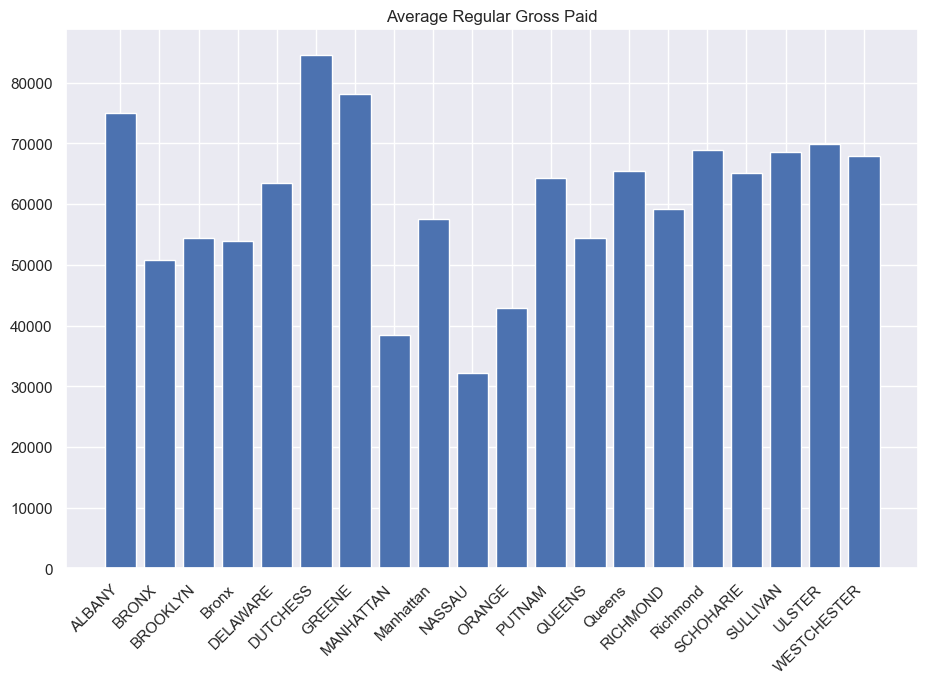

In [62]:
plt.bar(regular_gross.index, regular_gross);
plt.xticks(rotation=45, ha='right');
plt.title("Average Regular Gross Paid");
plt.savefig("regular_gross.png")